# Tanzania Water Wells Project

Morgan Nash

August 2025

# Overview

build a classification model to predict functionality of water wells in Tanzania
in order to help a non-government organization (NGO) determine which wells they need to repair.

Not having access to clean water means significant time and energy is spent on travelling to collect water, taking women away from work and children away from school. Access to safe water and sanitation improves health and helps families protect themselves from illness and disease

## Business Understanding

In [1]:
#clean drinking water, look deeper to see looking at different features like pump creation or water to predict pump is functional or needs repair
#predict which water pumps are faulty to promote access to clean, potable water across Tanzania
#global climate change->water scarcity->increasing problem in Tanzania, either intense and destructive rainfall or long dry spells.
#classification model to predict functionality of pumps

## Data Understanding

The data for this project comes from Taarifa, who compiled data from the Tanzania Ministry of Water, and was accessed through DrivenData.org. The data contains 59,400 records of water wells, each with 41 features. Our target is **status_group** which contains labeling of whether a pump is functional, functional needs repair, or non functional. After cleaning the data, we'll be using the features to build a classification model to predict the status of water wells.


Training Labels Dataset:
* id: Unique identifier for each water pump
* status_group: contains labels whether a pump is functional, functional needs repair, or non functional

* (status_group will be our target)

Training Values Dataset:
* id: Unique identifier for each water pump
* amount_tsh: Total static head (amount of water available to pump)
* date_recorded: Date the pump data was recorded
* funder: Person or org funded the pump installation
* gps_height: Altitude of the pump location
* installer: Person or org that installed the pump
* longitude: GPS longitude coordinate of the pump location
* latitude: GPS latitude coordinate of the pump location
* wpt_name: Name of the waterpoint (if available)
* num_private: Number of private plots reserved for the waterpoint
* basin: Geographic basin of the pump location
* subvillage: Geographic location within the village
* region: Geographic location
* region_code: Coded- geographic region
* district_code: Coded- administrative district
* lga: Geographic location (Local Government Area)
* ward: Geographic location (Administrative division)
* population: Population served by the well
* public_meeting: T/F Indicator of whether there was a public meeting about the well
* recorded_by: Group entering this row of data
* scheme_management: Who operates the waterpoint
* scheme_name: Who operates the waterpoint
* permit: Indicator of whether the waterpoint is permitted
* construction_year: Year the pump was installed
* extraction_type: The kind of extraction the waterpoint uses
* extraction_type_group: The kind of extraction the waterpoint uses
* extraction_type_class: The kind of extraction the waterpoint uses
* management: Type of management for the pump
* management_group: Grouped management type
* payment: Payment type for water service
* payment_type: Type of payment
* water_quality: Quality of water provided by the pump
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

# Exploratory Data Analysis

## Data Preparation & Cleaning

In [159]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the data
val = pd.read_csv('data/Training_set_values.csv')
val.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


At first glance, it looks like there's many categorical columns that are similar or duplicates suggesting multicollinearity, as well as some categorical columns that will need to be OneHotEncoded!

In [5]:
#load the data
labels = pd.read_csv('data/Training_set_labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [8]:
labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [9]:
# Check target class (im)balance with percentages: Pretty significant imbalance!!
labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Make the target binary:

In [10]:
# make problem binary: change the status_group labels 'non functional' and 'functinoal needs repair' into 'needs repair'
labels['status_group'] = labels['status_group'].map({'non functional':'needs repair',
                                                       'functional needs repair':'needs repair',
                                                       'functional':'functional'})

In [11]:
labels['status_group'].value_counts()

functional      32259
needs repair    27141
Name: status_group, dtype: int64

In [12]:
#although not all, this fixes a good amount of class imbalance
labels['status_group'].value_counts(normalize=True)

functional      0.543081
needs repair    0.456919
Name: status_group, dtype: float64

### Combine Values & Labels into One Dataframe

In [13]:
# Merge the two dataframes using shared 'id' column
df = pd.merge(val, labels, how = 'left', on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,needs repair
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [14]:
df.shape

(59400, 41)

In [15]:
#Check for nulls
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Cleaning Categorical Columns:

Decide which columns to drop, which that have missing values, and which that we will One Hot Encode after splitting:

In [16]:
#Look further at categorical columns
#compare columns that seem to have overlap and decide which to keep/which to get rid of (ensuring no multicolinearity)
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [17]:
#same value for every record, will drop
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [18]:
#basin and region will probably overlap..
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [19]:
#management group is slightly broader categories of the management column, I'll keep management_group
df[['management_group', 'management']].value_counts()

management_group  management      
user-group        vwc                 40507
                  wug                  6515
                  water board          2933
                  wua                  2535
commercial        private operator     1971
parastatal        parastatal           1768
commercial        water authority       904
other             other                 844
commercial        company               685
unknown           unknown               561
other             other - school         99
commercial        trust                  78
dtype: int64

In [20]:
#waterpoint_type_group and waterpoint_type columns contain the same information:
df[['waterpoint_type_group', 'waterpoint_type']].value_counts()

waterpoint_type_group  waterpoint_type            
communal standpipe     communal standpipe             28522
hand pump              hand pump                      17488
other                  other                           6380
communal standpipe     communal standpipe multiple     6103
improved spring        improved spring                  784
cattle trough          cattle trough                    116
dam                    dam                                7
dtype: int64

In [21]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [22]:
#reminder scheme_name has over half null values- will drop this column
df['scheme_name'].value_counts()

K                         682
None                      644
Borehole                  546
Chalinze wate             405
M                         400
                         ... 
Njinjo water supply         1
UNICRF                      1
Lion's                      1
Mkabenga spring source      1
Misambo mlimani             1
Name: scheme_name, Length: 2696, dtype: int64

In [23]:
#extraction columns are very similar, going to keep extraction_type_class as it is cleaner/concise (all "other.." are in one "other" column. 
df[['extraction_type_class', 'extraction_type_group' , 'extraction_type']].value_counts()

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               nira/tanira            nira/tanira                   8154
other                  other                  other                         6430
submersible            submersible            submersible                   4764
handpump               swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
handpump               india mark ii          india mark ii                 2400
                       afridev                afridev                       1770
submersible            submersible            ksb                           1415
rope pump              rope pump              other - rope pump              451
handpump               other handpump         other - swn 81                 229
wind-powered           wind-powered  

In [24]:
#these have the same info just slightly different labels
df[['payment_type', 'payment']].value_counts()

payment_type  payment              
never pay     never pay                25348
per bucket    pay per bucket            8985
monthly       pay monthly               8300
unknown       unknown                   8157
on failure    pay when scheme fails     3914
annually      pay annually              3642
other         other                     1054
dtype: int64

In [25]:
#quality_group almost the same as water_quality, for both, over 85% of the values are the same , these offer litle information gain
#and have significant LACK of variance
#will drop for now
df[['water_quality', 'quality_group']].value_counts()

water_quality       quality_group
soft                good             50818
salty               salty             4856
unknown             unknown           1876
milky               milky              804
coloured            colored            490
salty abandoned     salty              339
fluoride            fluoride           200
fluoride abandoned  fluoride            17
dtype: int64

In [26]:
#quantity_group and quantity are duplicates
df[['quantity_group', 'quantity']].value_counts()

quantity_group  quantity    
enough          enough          33186
insufficient    insufficient    15129
dry             dry              6246
seasonal        seasonal         4050
unknown         unknown           789
dtype: int64

In [27]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [28]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [29]:
#going to keep source_type where the distribution is more balanced.
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [30]:
#will One Hot Encode
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [31]:
#percent missing of public_meeting column:
pub_meet_null = (df['public_meeting'].isnull().sum() / len(df['public_meeting']))
pub_meet_null

0.05612794612794613

In [32]:
#will One Hot Encode
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [33]:
#percent missing of permit column:
perm_null = (df['permit'].isnull().sum() / len(df['permit']))
perm_null

0.05144781144781145

In [34]:
#will drop, just name for waterpoint
df['wpt_name'].value_counts()

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
                        ... 
Gati La Ngumo              1
Shule Ya Msingi Lutu       1
Ichambali                  1
Kwa Fenta                  1
Kwa Bagamba                1
Name: wpt_name, Length: 37400, dtype: int64

In [35]:
#both installer and funder have very high cardinality..:
df['installer'].value_counts()

DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
Altai Co. ltd                1
Institutional                1
Shule ya msingi ufala        1
Wizara  ya maji              1
Ester Ndege                  1
Name: installer, Length: 2145, dtype: int64

In [36]:
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Csf                          1
Lungwe                       1
Steven Nyangarika            1
Mbuzi Mawe                   1
Ester Ndege                  1
Name: funder, Length: 1897, dtype: int64

In [37]:
#use chi2 test to see if basin or region has stronger statistical relationship: will keep region, drop basin
from scipy.stats import chi2_contingency

#test relationship between 'basin' and 'status_group'
contingency_table_basin = pd.crosstab(df['basin'], df['status_group'])
chi2_basin, p_value_basin, _, _ = chi2_contingency(contingency_table_basin)
print(f"Chi-squared test between 'basin' and 'status_group': chi2 = {chi2_basin:.4f}, p-value = {p_value_basin:.10f}")

#test relationship between 'region' and 'status_group'
contingency_table_region = pd.crosstab(df['region'], df['status_group'])
chi2_region, p_value_region, _, _ = chi2_contingency(contingency_table_region)
print(f"Chi-squared test between 'region' and 'status_group': chi2 = {chi2_region:.4f}, p-value = {p_value_region:.10f}")

Chi-squared test between 'basin' and 'status_group': chi2 = 1579.7734, p-value = 0.0000000000
Chi-squared test between 'region' and 'status_group': chi2 = 2967.8915, p-value = 0.0000000000


## Dropping Categorical Columns:

As you can see, many categorical column pairs have duplicate and/or very similar information. The following are the categorical columns that I will drop as well as the reason to drop:\
**recorded_by**: This is the same string for every entry\
**management**: I will keep management_group which contains slightly broader categories of management\
**waterpoint_type**: redundant with waterpoint_type_group\
**payment**: redundant with payment_type\
**extraction_type** & **extraction_type_group**: keeping extraction_type_class so these are not necessary\
**date_recorded**: I'm keeping construction_year so this is not necessary\
**source_class** & **source**: dropping these as I'll be keeping source_type\
**quantity_group**: redundant with quantity\
**quality_group** & **water_quality**: both have 85% of the values that are the same, lack of variance \
**wpt_name**: just a name for the waterpoint, won't help with modeling\
**subvillage**, **lga**, **ward**: can all be represented by region column\
**scheme_name**: contains too many unique values and too many nulls, keeping scheme_management\
**funder** & **installer**: both have very very high cardinality\
**basin**: too similar to region

In [38]:
df_cleaned = df.drop(['recorded_by', 'management', 'waterpoint_type', 'payment', 'extraction_type', 'extraction_type_group', 
        'date_recorded', 'source_class', 'source', 'quantity_group', 'quality_group', 'water_quality', 'wpt_name', 'subvillage', 'lga', 'ward',
         'scheme_name', 'funder', 'installer', 'basin'], axis=1)

In [39]:
#check what's left that has missing values:
percent_missing = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

#only show columns with nulls
missing_value_df = pd.DataFrame({'column_name': df_cleaned.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]

#print result
print("Percentage of null values per column:")
print(missing_value_df.sort_values('percent_missing', ascending=False))

Percentage of null values per column:
                         column_name  percent_missing
scheme_management  scheme_management         6.526936
public_meeting        public_meeting         5.612795
permit                        permit         5.144781


In [40]:
#drop rows where permit, public_meeting, and scheme_management have missing values:
df_cleaned1 = df_cleaned.dropna(subset=['permit', 'public_meeting', 'scheme_management'])

In [41]:
df_cleaned1.shape

(49841, 21)

In [42]:
df_cleaned1.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region,region_code,district_code,population,...,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quantity,source_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,34.938093,-9.856322,0,Iringa,11,5,109,...,VWC,False,1999,gravity,user-group,annually,enough,spring,communal standpipe,functional
2,34310,25.0,686,37.460664,-3.821329,0,Manyara,21,4,250,...,VWC,True,2009,gravity,user-group,per bucket,enough,dam,communal standpipe,functional
3,67743,0.0,263,38.486161,-11.155298,0,Mtwara,90,63,58,...,VWC,True,1986,submersible,user-group,never pay,dry,borehole,communal standpipe,needs repair
5,9944,20.0,0,39.172796,-4.765587,0,Tanga,4,8,1,...,VWC,True,2009,submersible,user-group,per bucket,enough,other,communal standpipe,functional
6,19816,0.0,0,33.362410,-3.766365,0,Shinyanga,17,3,0,...,VWC,True,0,handpump,user-group,never pay,enough,borehole,hand pump,needs repair


In [43]:
#print categorical columns after dropping some:
cat_clean = [var for var in df_cleaned1.columns if df_cleaned1[var].dtype=='O']
cat_clean

['region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quantity',
 'source_type',
 'waterpoint_type_group',
 'status_group']

In [44]:
#double check for nulls:
df_cleaned1.isna().sum()

id                       0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
num_private              0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quantity                 0
source_type              0
waterpoint_type_group    0
status_group             0
dtype: int64

### Cleaning Numerical Columns:

In [45]:
#print numerical columns
numerical = [var for var in df_cleaned1.columns if df_cleaned1[var].dtype!='O']
numerical

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [46]:
#check for duplicate records using the id column, if no duplicates in id column, i will assume each row is its own pump
df_cleaned1.duplicated(subset=['id']).sum()

0

In [47]:
#look at Summary Statistics for Numerical Columns:
print("Numeric Column Summary Statistics:")
numerical_stats = df_cleaned1.describe()
print(numerical_stats)

Numeric Column Summary Statistics:
                 id     amount_tsh    gps_height     longitude      latitude  \
count  49841.000000   49841.000000  49841.000000  49841.000000  4.984100e+04   
mean   37111.313316     352.215854    680.790253     34.228834 -5.750202e+00   
std    21437.495653    2793.448736    698.628110      6.260939  2.867979e+00   
min        2.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18545.000000       0.000000      0.000000     33.060320 -8.431873e+00   
50%    37032.000000       0.000000    404.000000     35.125791 -5.099327e+00   
75%    55641.000000      30.000000   1323.000000     37.314108 -3.342912e+00   
max    74247.000000  250000.000000   2770.000000     40.323402 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  49841.000000  49841.000000   49841.000000  49841.000000   
mean       0.537168     14.751891       5.865231    172.184507   
std       13.092193     17.157662       9.9018

In [48]:
#amount total static head- many records have 0.0 but technically, 0.0 could be accurrate, i.e. if the source is groundwater..
df_cleaned1['amount_tsh'].value_counts()

0.0         33667
500.0        2790
50.0         2042
1000.0       1382
20.0         1381
            ...  
5400.0          1
200000.0        1
900.0           1
53.0            1
12.0            1
Name: amount_tsh, Length: 91, dtype: int64

In [49]:
#Over 98% have value 0, will drop as this won't be helpful for modeling..
df_cleaned1['num_private'].value_counts()[:10]

0     49119
6        73
1        68
8        46
5        44
32       40
45       36
15       35
39       30
93       28
Name: num_private, dtype: int64

In [50]:
#many listed as 0..
df_cleaned1['longitude'].value_counts()

0.000000     1336
33.090347       2
32.967009       2
38.180538       2
37.538602       2
             ... 
35.399587       1
33.556570       1
35.833951       1
39.341224       1
35.416063       1
Name: longitude, Length: 48459, dtype: int64

In [51]:
#similar to longitude, same 1336 values are listed as very close to 0, suggesting placeholder values for lat and lon
df_cleaned1['latitude'].value_counts()

-2.000000e-08    1336
-2.480043e+00       2
-7.104923e+00       2
-2.467137e+00       2
-2.491942e+00       2
                 ... 
-3.293825e+00       1
-1.223421e+00       1
-4.127133e+00       1
-1.401503e+00       1
-1.101275e+01       1
Name: latitude, Length: 48461, dtype: int64

In [52]:
#a large portion are listed as 0, will need to fix!
df_cleaned1['gps_height'].value_counts()

 0       17148
-15         56
-13         48
 1290       47
-20         44
         ...  
 2332        1
 2417        1
 616         1
 2464        1
 2285        1
Name: gps_height, Length: 2426, dtype: int64

### Dropping Numerical Columns

The following are the numerical columns I will drop as well as the reason to drop:\
**id**: this is just a unique identifier, will not help with modeling\
**num_private**: over 98% have the value 0\
**region_code** & **district_code**: too similar/redundant with region column\

In [53]:
df_cleaned2 = df_cleaned1.drop(['id', 'num_private', 'region_code', 'district_code'], axis=1)

In [54]:
#Longitude column has 1336 rows with 0.0 and latitude has a matching amount of rows with -2.000000e-08 which is basically zero
#I'll assume these are placeholders as the true values are most likely unknown
#I will drop these rows as it accounts for less than 3% of our remaining data.
df_clean = df_cleaned2[(df_cleaned2['longitude'] != 0.0) | (df_cleaned2['latitude'] != -2.000000e-08)]
df_clean.head()

,amount_tsh,gps_height,longitude,latitude,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Iringa,109,True,VWC,False,1999,gravity,user-group,annually,enough,spring,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Manyara,250,True,VWC,True,2009,gravity,user-group,per bucket,enough,dam,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Mtwara,58,True,VWC,True,1986,submersible,user-group,never pay,dry,borehole,communal standpipe,needs repair
5,20.0,0,39.172796,-4.765587,Tanga,1,True,VWC,True,2009,submersible,user-group,per bucket,enough,other,communal standpipe,functional
6,0.0,0,33.362410,-3.766365,Shinyanga,0,True,VWC,True,0,handpump,user-group,never pay,enough,borehole,hand pump,needs repair


In [55]:
df_clean.shape

(48505, 17)

In [56]:
df_clean.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [57]:
#will need to fix years listed as 0:
df_clean['construction_year'].value_counts()[:20]

0       15990
2008     2431
2009     2306
2010     2012
2007     1425
2006     1329
2000     1253
2003     1191
2011     1032
1978      999
2004      989
2002      955
2005      881
1999      881
2012      836
1998      790
1995      783
1985      767
1984      711
1982      695
Name: construction_year, dtype: int64

In [58]:
df_clean['population'].value_counts()[:20]

0      16752
1       5763
150     1690
200     1503
250     1279
300     1100
50      1020
100      918
120      812
350      798
500      794
400      566
30       560
60       543
40       526
80       462
20       428
450      390
230      324
600      308
Name: population, dtype: int64

In [59]:
#look at numerical columns after dropping some:
num_clean = [var for var in df_clean.columns if df_clean[var].dtype!='O']
num_clean

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year']

## Modeling

In [60]:
df_clean.head()

,amount_tsh,gps_height,longitude,latitude,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Iringa,109,True,VWC,False,1999,gravity,user-group,annually,enough,spring,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Manyara,250,True,VWC,True,2009,gravity,user-group,per bucket,enough,dam,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Mtwara,58,True,VWC,True,1986,submersible,user-group,never pay,dry,borehole,communal standpipe,needs repair
5,20.0,0,39.172796,-4.765587,Tanga,1,True,VWC,True,2009,submersible,user-group,per bucket,enough,other,communal standpipe,functional
6,0.0,0,33.362410,-3.766365,Shinyanga,0,True,VWC,True,0,handpump,user-group,never pay,enough,borehole,hand pump,needs repair


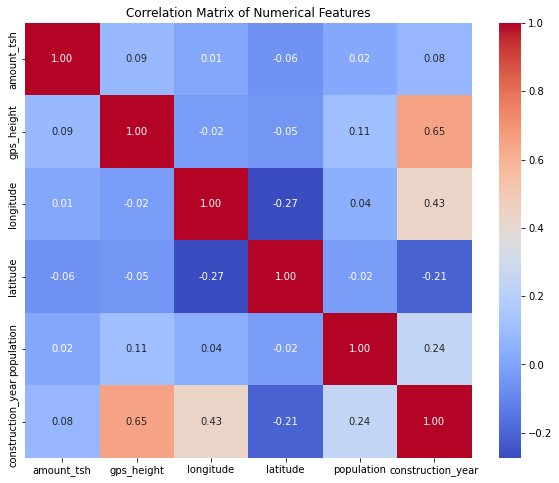

In [61]:
#Check for multicollinearity among numerical columns as they are:
#Select only the numerical columns from df_clean
numerical_df = df_clean.select_dtypes(include=np.number)

#Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

#Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**gps_height** and **construction_year** seem to be correlated, it is not a very strong correlation. This could suggest that as a water pump's construction year increases (the pump is newer), its gps_height tends to be higher potentially indicating a trend of building newer water pumps in areas with higher elevation.

In [62]:
df_clean.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48505 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             48505 non-null  float64
 1   gps_height             48505 non-null  int64  
 2   longitude              48505 non-null  float64
 3   latitude               48505 non-null  float64
 4   region                 48505 non-null  object 
 5   population             48505 non-null  int64  
 6   public_meeting         48505 non-null  object 
 7   scheme_management      48505 non-null  object 
 8   permit                 48505 non-null  object 
 9   construction_year      48505 non-null  int64  
 10  extraction_type_class  48505 non-null  object 
 11  management_group       48505 non-null  object 
 12  payment_type           48505 non-null  object 
 13  quantity               48505 non-null  object 
 14  source_type            48505 non-null  object 
 15  wa

In [78]:
# Label Encode target variable, status_group
le = LabelEncoder()
y = le.fit_transform(df_clean['status_group'])

# Set X to dataframe features without target variable
X = df_clean.drop('status_group', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
print("Mapping of original labels to integers:")
for i, label in enumerate(le.classes_):
    print(f"{label} is encoded as {i}")

Mapping of original labels to integers:
functional is encoded as 0
needs repair is encoded as 1


In [80]:
X_train.shape, X_test.shape

((38804, 16), (9701, 16))

In [81]:
#instantiate DummyClassifier:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)

# Fit the dummy model to your training data
# This is a formality, as it doesn't learn from the features
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
dummy_pred = dummy_model.predict(X_test)

# Evaluate the dummy model's performance
print("Dummy Model Classification Report:")
print(classification_report(y_test, dummy_pred))

Dummy Model Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      5358
           1       0.00      0.00      0.00      4343

    accuracy                           0.55      9701
   macro avg       0.28      0.50      0.36      9701
weighted avg       0.31      0.55      0.39      9701



#### Imputation for Numeric Columns:

In [82]:
#GPS Height Column Imputation (using KNN), takes the nearest 5 records and imputes the average gps_height:
from sklearn.impute import KNNImputer
X_train['gps_height'] = X_train['gps_height'].replace(0.0, np.nan)
X_test['gps_height'] = X_test['gps_height'].replace(0.0, np.nan)

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train[['longitude', 'latitude', 'gps_height']])

X_train[['longitude', 'latitude', 'gps_height']] = imputer.transform(X_train[['longitude', 'latitude', 'gps_height']])
X_test[['longitude', 'latitude', 'gps_height']] = imputer.transform(X_test[['longitude', 'latitude', 'gps_height']])

In [83]:
#Population Column Imputation (dealing with placeholder values in population column)
#Create indicator column in both sets is_population_missing
X_train['is_population_missing'] = (X_train['population'] == 0)
X_test['is_population_missing'] = (X_test['population'] == 0)

#Calculate median poplation on the TRAINING data only by region:
median_by_region = X_train[X_train['population'] != 0].groupby('region')['population'].median()

#Fill missing values in both sets using the training data's median
X_train['population'] = X_train.apply(
    lambda row: median_by_region.get(row['region'], 0) if row['population'] == 0 else row['population'],
    axis=1
)
X_test['population'] = X_test.apply(
    lambda row: median_by_region.get(row['region'], 0) if row['population'] == 0 else row['population'],
    axis=1
)

In [84]:
#Construction Year Column Imputation (dealing with placeholder values in construction_year)
#Create indicator column in both sets is_year_missing
X_train['is_year_missing'] = (X_train['construction_year'] == 0)
X_test['is_year_missing'] = (X_test['construction_year'] == 0)

#Calculate the median year on the TRAINING data only
median_year = X_train.loc[X_train['construction_year'] != 0, 'construction_year'].median()

# Replace the 0s in both sets with the TRAINING median
X_train['construction_year'] = X_train['construction_year'].replace(0, median_year)
X_test['construction_year'] = X_test['construction_year'].replace(0, median_year)

#### Handling Outliers in Numeric Columns:

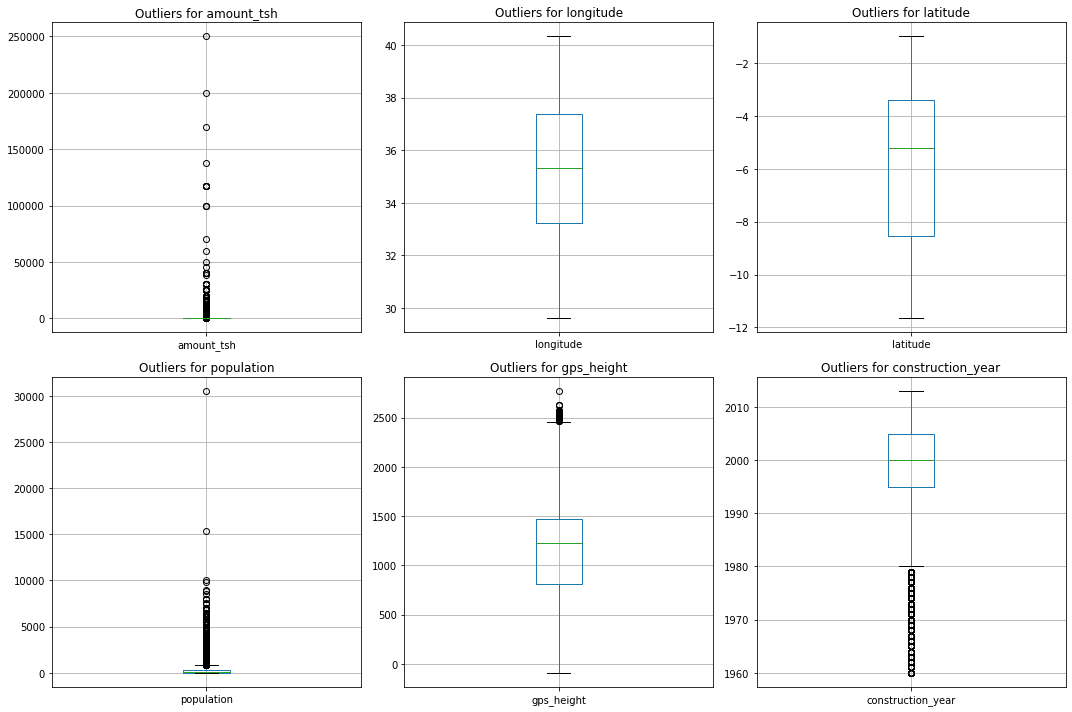

In [85]:
#check outliers in numeric columns:
numerical_cols = ['amount_tsh', 'longitude', 'latitude', 'population', 'gps_height', 'construction_year']

# Create subplots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    X_train.boxplot(column=col)
    plt.title(f'Outliers for {col}')

plt.tight_layout()
plt.show()

In [86]:
#define functions that use IQR capping to handle outliers, 1st gets fences, 2nd caps column values to those fences:
def get_iqr_fences(df, column_name):
    """
    Calculates the lower and upper fences for outliers using the IQR method.
    
    Args:
        df (pd.DataFrame): The DataFrame to use for calculation.
        column_name (str): The name of the column to analyze.
        
    Returns:
        tuple: A tuple containing the lower and upper fences.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    return lower_fence, upper_fence


def cap_outliers_with_fences(df, column_name, lower_fence, upper_fence):
    """
    Caps the values in a column to the provided lower and upper fences.
    
    Args:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to cap.
        lower_fence (float): The lower boundary to cap values at.
        upper_fence (float): The upper boundary to cap values at.
        
    Returns:
        pd.DataFrame: The DataFrame with the capped column.
    """
    df[column_name] = np.where(
        df[column_name] > upper_fence,
        upper_fence,
        df[column_name]
    )
    df[column_name] = np.where(
        df[column_name] < lower_fence,
        lower_fence,
        df[column_name]
    )
    return df


In [98]:
#Handling Population Column Outliers:
#For population, I'll use IQR to find the upper fence, but set the lower fence to a minimum of 0.
lower_fence_pop, upper_fence_pop = get_iqr_fences(X_train, 'population')
#Using a logical minimum of 0
lower_fence_pop = max(0, lower_fence_pop)
print(f"Population fences: Lower: {lower_fence_pop}, Upper: {upper_fence_pop}")

X_train = cap_outliers_with_fences(X_train, 'population', lower_fence_pop, upper_fence_pop)
X_test = cap_outliers_with_fences(X_test, 'population', lower_fence_pop, upper_fence_pop)

Population fences: Lower: 0, Upper: 798.5


In [99]:
#Handling Amount_tsh Column Outliers:
#For amount_tsh, I'll set upper fence to 95%, but set the lower fence to a minimum of 0.
upper_fence_tsh = X_train['amount_tsh'].quantile(0.95)
# Set a logical minimum of 0
lower_fence_tsh = 0

print(f"Amount_tsh percentile fences: Lower: {lower_fence_tsh}, Upper: {upper_fence_tsh}")

# Cap the values in the training and test sets
X_train = cap_outliers_with_fences(X_train, 'amount_tsh', lower_fence_tsh, upper_fence_tsh)
X_test = cap_outliers_with_fences(X_test, 'amount_tsh', lower_fence_tsh, upper_fence_tsh)


Amount_tsh percentile fences: Lower: 0, Upper: 1807.062499998423


In [100]:
#Handling GPS_Height Column Outliers:
#For gps_height, I'll use the standard IQR method to find both the lower and upper fences and cap values that fall outside that range.
lower_fence_gps, upper_fence_gps = get_iqr_fences(X_train, 'gps_height')
print(f"gps_height fences: Lower: {lower_fence_gps}, Upper: {upper_fence_gps}")

X_train = cap_outliers_with_fences(X_train, 'gps_height', lower_fence_gps, upper_fence_gps)
X_test = cap_outliers_with_fences(X_test, 'gps_height', lower_fence_gps, upper_fence_gps)

gps_height fences: Lower: -181.4999999999999, Upper: 2457.7


In [101]:
#Handling Construction_Year Column Outliers:
#For construction_year, I'll use the IQR to find both the lower and upper fences, but also set a logical lower bound.
lower_fence_year, upper_fence_year = get_iqr_fences(X_train, 'construction_year')
# Enforce a logical minimum of 1900
lower_fence_year = max(1900, lower_fence_year)
print(f"construction_year fences: Lower: {lower_fence_year}, Upper: {upper_fence_year}")

X_train = cap_outliers_with_fences(X_train, 'construction_year', lower_fence_year, upper_fence_year)
X_test = cap_outliers_with_fences(X_test, 'construction_year', lower_fence_year, upper_fence_year)

construction_year fences: Lower: 1980.0, Upper: 2020.0


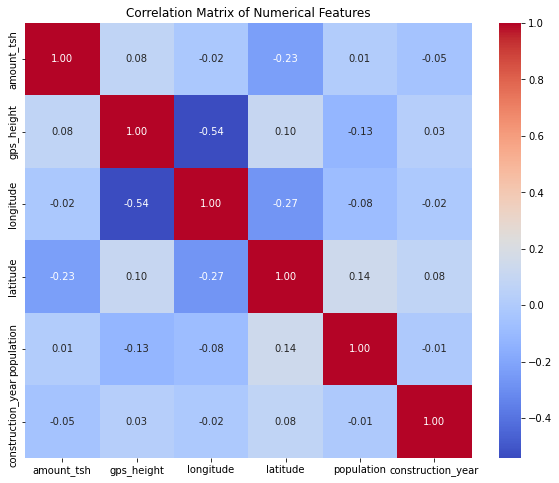

In [104]:
#Check for multicollinearity among numerical columns after outliers handled and columns imputed:
#Select only the numerical columns from df_clean
numerical_df2 = X_train.select_dtypes(include=np.number)

#Calculate the correlation matrix
correlation_matrix2 = numerical_df2.corr()

#Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### One Hot Encode Categorical Features:

In [109]:
#Select categorical columns to one hot encode:
categorical_features = ['region', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class',
                        'management_group', 'payment_type', 'quantity', 'source_type', 'waterpoint_type_group']

#Instantiate Encoder, drop first to avoid dummy variable trap
ohe = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')

#Fit encoder on the training data only
ohe.fit(X_train[categorical_features])

# Transform both the training and testing sets
X_train_ohe = ohe.transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

# Get the names of the new one-hot encoded columns
ohe_feature_names = ohe.get_feature_names(categorical_features)

# Create a DataFrame from the transformed array
X_train_ohe_df = pd.DataFrame(X_train_ohe, index=X_train.index, columns=ohe_feature_names)
X_test_ohe_df = pd.DataFrame(X_test_ohe, index=X_test.index, columns=ohe_feature_names)


#### Use Standard Scaler to Scale Numeric Features:

In [110]:
#Select numerical columns to scale:
numerical_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']

#Instantiate Scaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Fit scaler on training data only, transform both training and testing sets
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

# Create a DataFrame from the transformed array
X_train_scaled_df = pd.DataFrame(X_train_scaled[numerical_features], index=X_train.index, columns=numerical_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled[numerical_features], index=X_test.index, columns=numerical_features)


In [112]:
# Concatenate the preprocessed numeric and one-hot encoded categorical data
X_train_comb = pd.concat([X_train_scaled_df, X_train_ohe_df], axis=1)
X_test_comb = pd.concat([X_test_scaled_df, X_test_ohe_df], axis=1)

print("Final training data shape:", X_train_comb.shape)
print("Final testing data shape:", X_test_comb.shape)

Final training data shape: (38804, 70)
Final testing data shape: (9701, 70)


### Logistic Regression Modeling:

In [133]:
#Numeric Only Model
#instantiate model
numeric_model = LogisticRegression(random_state=42, max_iter=2000)

#fit model
numeric_model.fit(X_train_scaled_df, y_train)

#make predictions on the test set
y_pred_num = numeric_model.predict(X_test_scaled_df)

# Evaluate the model with a classification report
print("Model using Numeric Features Classification Report:")
print(classification_report(y_test, y_pred_num))

Model using Numeric Features Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      5358
           1       0.60      0.48      0.53      4343

    accuracy                           0.62      9701
   macro avg       0.62      0.61      0.61      9701
weighted avg       0.62      0.62      0.62      9701



In [134]:
#Combined Numerical and Categorical Model using all features:
#instantiate model
comb_model = LogisticRegression(random_state=42, max_iter=2000)

#fit model
comb_model.fit(X_train_comb, y_train)

#make predictions on the test set
y_pred_comb = comb_model.predict(X_test_comb)

# Evaluate the model with a classification report
print("Model using Combined Features Classification Report:")
print(classification_report(y_test, y_pred_comb))

Model using Combined Features Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      5358
           1       0.79      0.60      0.68      4343

    accuracy                           0.75      9701
   macro avg       0.76      0.73      0.74      9701
weighted avg       0.75      0.75      0.74      9701



In [122]:
#Instantiate LogReg model, setting max_iter high to ensure the model converges
baseline_model = LogisticRegression(random_state=42, max_iter=2000)

#cross-validation to get recall scores
#using 'recall_weighted' because it's a multiclass problem and
#it accounts for class imbalance by weighting the scores by the number of samples in each class.
recall_scores = cross_val_score(baseline_model, X_train_comb, y_train, cv=5, scoring='recall_weighted')

# 3. Print the results
print("Individual recall scores from each fold:", recall_scores)
print("Mean recall score (your baseline):", np.mean(recall_scores))

Individual recall scores from each fold: [0.75248035 0.75299575 0.75106301 0.7432032  0.75927835]
Mean recall score (your baseline): 0.7518041303530605


In [126]:
#Feature Importance Analysis using Model Coefficients:
#get the feature names from dataframe columns
feature_names = X_train_comb.columns

#get the coefficients from the fitted model
#coefficients are stored in the 'coef_' attribute
coefficients = comb_model.coef_[0]  #take the first row for multiclass

#create new dataframe to view the coefficients easily
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

#sort the dataframe to see the most influential features:
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

print(coefficients_df.head(10))

                          Feature  Coefficient  Absolute_Coefficient
55                quantity_enough    -4.240252              4.240252
57              quantity_seasonal    -3.971743              3.971743
56          quantity_insufficient    -3.743946              3.743946
58               quantity_unknown    -2.371609              2.371609
69    waterpoint_type_group_other     2.101104              2.101104
36  scheme_management_Water Board    -1.824155              1.824155
28        scheme_management_Other    -1.725756              1.725756
15                   region_Mbeya     1.662795              1.662795
12                   region_Lindi     1.645373              1.645373
17                  region_Mtwara     1.615588              1.615588


In [124]:
df_clean['quantity'].value_counts()

enough          28157
insufficient    11652
dry              4958
seasonal         3428
unknown           310
Name: quantity, dtype: int64

In [125]:
"""
Further analysis of the dataset revealed that water wells with the 'enough' water quantity have a higher likelihood of being functional,\
while water wells that are 'dry' are almost certainly non-functional
"""

"\nFurther analysis of the dataset revealed that water wells with the 'enough' water quantity have a higher likelihood of being functional,while water wells that are 'dry' are almost certainly non-functional\n"

In [139]:
#list numeric features
numerical_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']

#find all one-hot encoded columns that belong to 'quantity'
quantity_ohe_cols = [col for col in X_train_comb.columns if col.startswith('quantity_')]

#combine the two lists
final_features = numerical_features + quantity_ohe_cols

#create new dataframes with only the selected features
X_train_num_quan = X_train_comb[final_features]
X_test_num_quan = X_test_comb[final_features]


In [135]:
#Combined Numerical and all one hot encoded Quantity columns:
#instantiate model
num_quan_model = LogisticRegression(random_state=42, max_iter=2000)

#fit model
num_quan_model.fit(X_train_num_quan, y_train)

#make predictions on the test set
y_pred_num_quan = num_quan_model.predict(X_test_num_quan)

# Evaluate the model with a classification report
print("Model using Numeric Features + Quantity Columns Classification Report:")
print(classification_report(y_test, y_pred_num_quan))

Model using Numeric Features + Quantity Columns Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.75      5358
           1       0.73      0.49      0.59      4343

    accuracy                           0.69      9701
   macro avg       0.70      0.67      0.67      9701
weighted avg       0.70      0.69      0.68      9701



In [137]:
#find all one-hot encoded columns for quantity, scheme_management, and region:
quantity_ohe_cols = [col for col in X_train_comb.columns if col.startswith('quantity_')]
scheme_management_ohe_cols = [col for col in X_train_comb.columns if col.startswith('scheme_management_')]
region_ohe_cols = [col for col in X_train_comb.columns if col.startswith('region_')]

#combine all the lists
final_features = numerical_features + quantity_ohe_cols + scheme_management_ohe_cols + region_ohe_cols

#create new modeling dataframes with the selected features
X_train_selected = X_train_comb[final_features]
X_test_selected = X_test_comb[final_features]

print("Shape of selected training data:", X_train_selected.shape)
print("Shape of selected testing data:", X_test_selected.shape)

Shape of selected training data: (38804, 41)
Shape of selected testing data: (9701, 41)


In [138]:
#Combined Numerical and all one hot encoded Quantity, Scheme_Management, and Region columns Model:
#instantiate the model
selected_model = LogisticRegression(random_state=42, max_iter=2000)

#fit the model
selected_model.fit(X_train_selected, y_train)

#make predictions on the test set
y_pred_selected = selected_model.predict(X_test_selected)

#evaluate the model with a classification report
print("Model using Numeric Features+ Quantity, Scheme_Management, and Region Classification Report:")
print(classification_report(y_test, y_pred_selected))

Model using Numeric Features+ Quantity, Scheme_Management, and Region Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      5358
           1       0.74      0.53      0.62      4343

    accuracy                           0.70      9701
   macro avg       0.71      0.69      0.69      9701
weighted avg       0.71      0.70      0.70      9701



#### Hyperparameter Tuning:

In [149]:
#create a dictionary of hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [150]:
#instantiate model
lr_tune = LogisticRegression(random_state=42, max_iter=2000)

#instantiate GridSearchCV (finds  optimal combination of hyperparameters for a model)
grid_search = GridSearchCV(
    estimator=lr_tune,
    param_grid=param_grid,
    cv=5,                #number of cross-validation folds
    scoring='recall',    #recall as scoring metric
    n_jobs=-1,           
    verbose=1)

In [151]:
#fit the grid search to combined training data
grid_search.fit(X_train_comb, y_train)

#print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

#print the best score achieved
print("Best recall score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'C': 100, 'solver': 'liblinear'}
Best recall score: 0.6117


In [152]:
#get the best model from the grid search
best_tuned_model = grid_search.best_estimator_

#make predictions on the test set
y_pred_tuned = best_tuned_model.predict(X_test_comb)

#evaluate the final, tuned model with a classification report
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      5358
           1       0.78      0.60      0.68      4343

    accuracy                           0.75      9701
   macro avg       0.76      0.73      0.74      9701
weighted avg       0.75      0.75      0.74      9701



This is very similar to the original combined model.

AUC Score: 0.8165


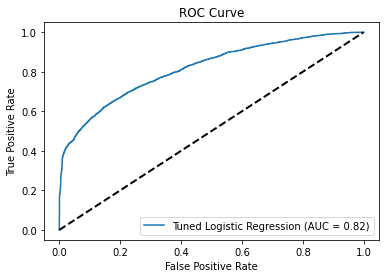

In [155]:
#Plot ROC Curve:

from sklearn.metrics import RocCurveDisplay

#get the best model from grid search
best_tuned_model = grid_search.best_estimator_

#get the probability of the positive class (Class 1)
# You must use .predict_proba() for ROC/AUC analysis
y_pred_proba = best_tuned_model.predict_proba(X_test_comb)[:, 1]

#calculate the ROC curve data points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#calculate the AUC score
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.4f}")

#plot the ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Tuned Logistic Regression')
display.plot()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve')
plt.show()

"Theres an 81.65% chance that this model can correctly distinguish between a randomly selected pump that needs repair (Class 1)\
and a randomly selected pump that does not need repair (Class 0)."

#### Class Weighting:

In [156]:

#instantiate model with the class_weight parameter as balanced
lr_weighted = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')

#define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

#instantiate GridSearchCV with the new model
grid_search_cw = GridSearchCV(
    estimator=lr_weighted,
    param_grid=param_grid,
    cv=5,
    scoring='recall', #priority metric remains 'recall'
    n_jobs=-1,
    verbose=1
)

#fit the new grid search to training data
grid_search_cw.fit(X_train_comb, y_train)

# Print the best parameters and score:
print("Best parameters found with Class Weighting: ", grid_search_cw.best_params_)
print("Best recall score with Class Weighting: {:.4f}".format(grid_search_cw.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found with Class Weighting:  {'C': 0.01, 'solver': 'lbfgs'}
Best recall score with Class Weighting: 0.6672


This recall score is better than any of the previous models.

In [157]:
#get the best model from the grid search with class weighting
best_tuned_model_cw = grid_search_cw.best_estimator_

#make predictions on the test set using this model
y_pred_tuned_cw = best_tuned_model_cw.predict(X_test_comb)

#evaluate the final, tuned model
print("Tuned Model with Class Weighting Classification Report:")
print(classification_report(y_test, y_pred_tuned_cw))

Tuned Model with Class Weighting Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      5358
           1       0.73      0.66      0.69      4343

    accuracy                           0.73      9701
   macro avg       0.73      0.73      0.73      9701
weighted avg       0.73      0.73      0.73      9701



Confusion Matrix:
[[4276 1082]
 [1490 2853]]


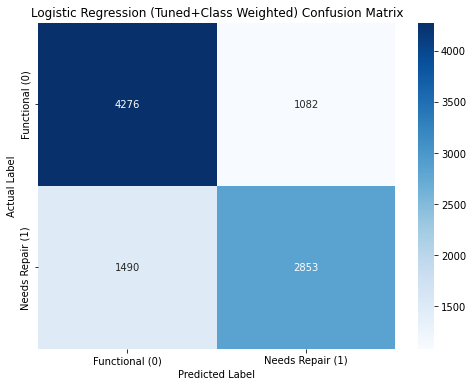

In [171]:
# Generate the confusion matrix
cm_tuned_cw = confusion_matrix(y_test, y_pred_tuned_cw)

# Print the matrix
print("Confusion Matrix:")
print(cm_tuned_cw)

# Optional: Visualize the matrix for easier interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_cw, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Functional (0)', 'Needs Repair (1)'],
            yticklabels=['Functional (0)', 'Needs Repair (1)'])
plt.title('Logistic Regression (Tuned+Class Weighted) Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Decision Tree Modeling:

In [161]:
#create the classifier, fit it on the combined training data and make predictions on the test set
clf1 = DecisionTreeClassifier(criterion='entropy')

clf1.fit(X_train_comb, y_train)

DecisionTreeClassifier(criterion='entropy')

In [163]:
#make predictions on the test set
y_pred_dt = clf1.predict(X_test_comb)

#evaluate the model with a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5358
           1       0.76      0.75      0.75      4343

    accuracy                           0.78      9701
   macro avg       0.78      0.78      0.78      9701
weighted avg       0.78      0.78      0.78      9701



In [164]:
#get feature importances from the fitted Decision Tree model
feature_importances = clf1.feature_importances_

#create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train_comb.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                        Feature  Importance
2                     longitude    0.209310
3                      latitude    0.196858
1                    gps_height    0.116562
69  waterpoint_type_group_other    0.060358
4                    population    0.058216
5             construction_year    0.056924
57            quantity_seasonal    0.047226
55              quantity_enough    0.041403
0                    amount_tsh    0.024981
56        quantity_insufficient    0.021707


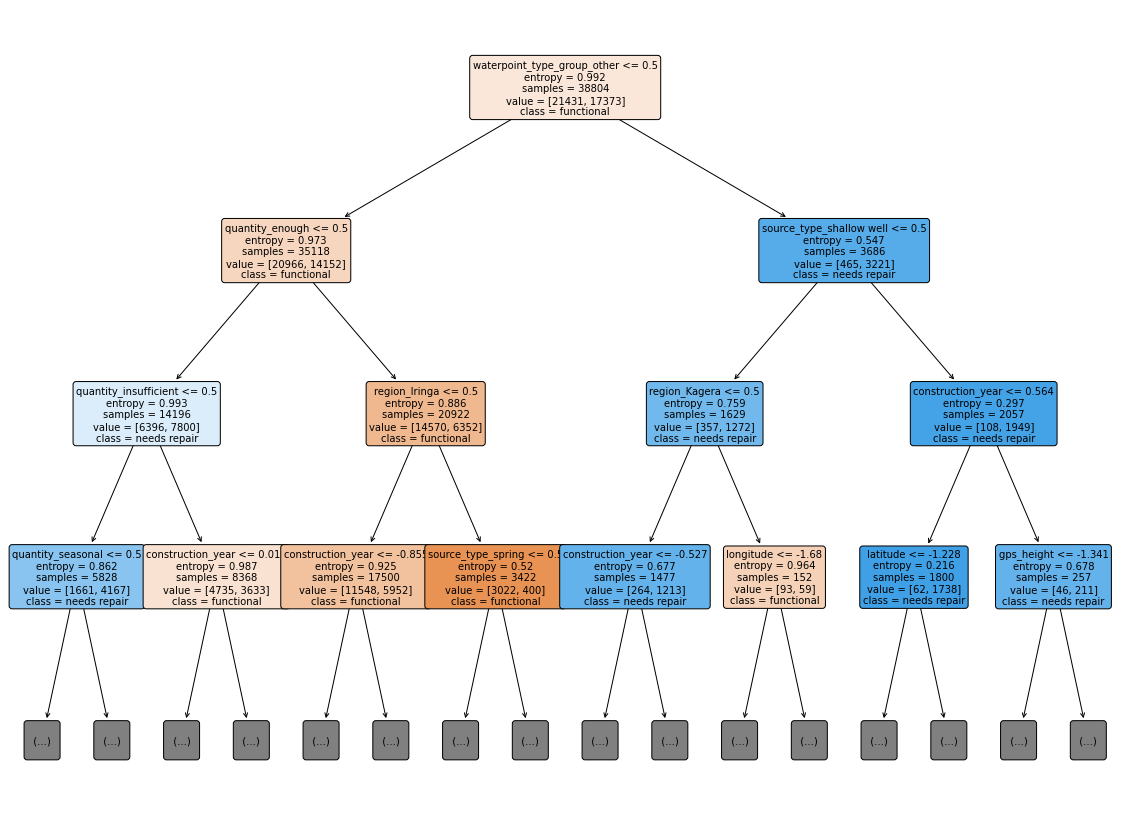

In [168]:
from sklearn.tree import plot_tree

# Set the figure size for better visibility
plt.figure(figsize=(20, 15))

# Plot the tree
plot_tree(clf1, 
          feature_names=X_train_comb.columns.tolist(), 
          class_names=['functional', 'needs repair'], 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth= 3)

plt.show()

Confusion Matrix:
[[4300 1058]
 [1081 3262]]


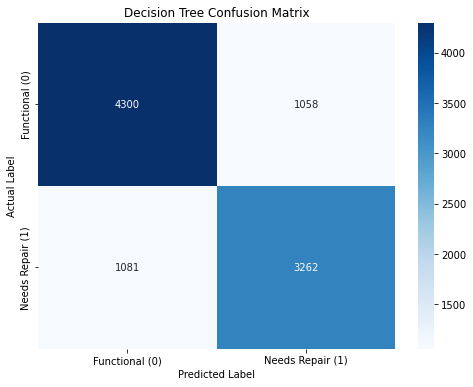

In [170]:
# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print the matrix
print("Confusion Matrix:")
print(cm_dt)

# Optional: Visualize the matrix for easier interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Functional (0)', 'Needs Repair (1)'],
            yticklabels=['Functional (0)', 'Needs Repair (1)'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Conclusions

## Limitations

## Recommendations

## Next Steps